In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orders = pd.read_csv('food_order.csv')
df_orders.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
df_orders.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [51]:
# Making the rating column as numeric
df_orders['rating'] = pd.to_numeric(df_orders['rating'], errors='coerce')

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [7]:
df_orders.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [8]:
df_orders[df_orders['rating'].isna()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


In [9]:
df_orders['rating'].isna().sum()

736

In [52]:
# Fill the rating null column values with 0
df_orders['rating'] = df_orders['rating'].fillna(0)

In [11]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [12]:
df_orders.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,2.659642,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,2.195280,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,0.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,0.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [13]:
df_orders.describe(include='object')

,restaurant_name,cuisine_type,day_of_the_week
count,1898,1898,1898
unique,178,14,2
top,Shake Shack,American,Weekend
freq,219,584,1351


In [14]:
df_orders.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [15]:
df_orders.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [16]:
df_orders.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [53]:
# Counting records in each rating value
df_orders.rating.value_counts()

rating
0.0    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

In [18]:
# Showing the percentage of ratings
df_orders.rating.value_counts(normalize=True).mul(100).round(2)

rating
0.0    38.78
5.0    30.98
4.0    20.34
3.0     9.91
Name: proportion, dtype: float64

In [54]:
# Creating a new column with the total time of an order
df_orders['total_delivery_time'] = df_orders['food_preparation_time'] + df_orders['delivery_time']

In [20]:
df_orders.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [21]:
df_orders.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,2.659642,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,2.195280,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,0.000000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,0.000000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


In [22]:
df_orders.duplicated().sum()

0

In [23]:
df_orders.groupby('cuisine_type').ngroups

14

In [24]:
df_orders.groupby('cuisine_type')['rating'].mean()

cuisine_type
American          2.708904
Chinese           2.683721
French            2.388889
Indian            3.109589
Italian           2.516779
Japanese          2.540426
Korean            2.846154
Mediterranean     2.934783
Mexican           2.753247
Middle Eastern    2.938776
Southern          3.294118
Spanish           2.416667
Thai              2.210526
Vietnamese        2.857143
Name: rating, dtype: float64

In [25]:
# Checking number of order by cuisine type in weekdays and weekends
df_orders.groupby(['day_of_the_week', 'cuisine_type'])['rating'].size()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

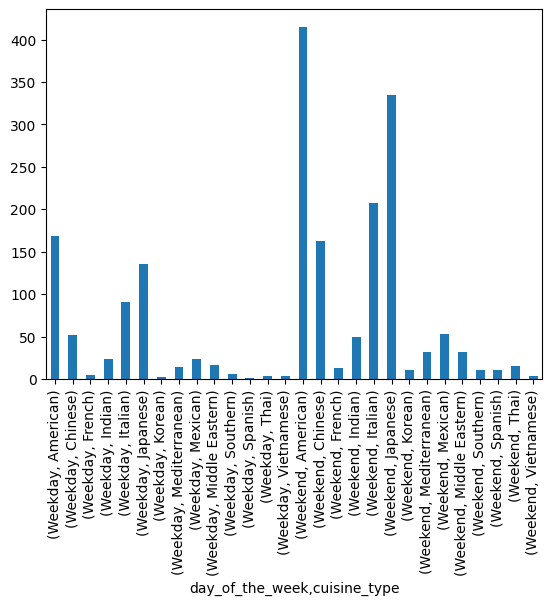

In [26]:
df_orders.groupby(['day_of_the_week', 'cuisine_type'])['rating'].size().plot(kind='bar');

In [55]:
# Calcula a media de tempo total para cada valor de rating
print(df_orders.groupby('rating')['total_delivery_time'].mean().round(2))

# Conta a quantidade de registros de total_delivery_time para cada valor de rating
print(df_orders.groupby('rating')['total_delivery_time'].size())

rating
0.0    51.53
3.0    51.99
4.0    51.26
5.0    51.57
Name: total_delivery_time, dtype: float64
rating
0.0    736
3.0    188
4.0    386
5.0    588
Name: total_delivery_time, dtype: int64


In [28]:
# Check number of orders by cuisine type
df_orders.groupby("cuisine_type").size()

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
dtype: int64

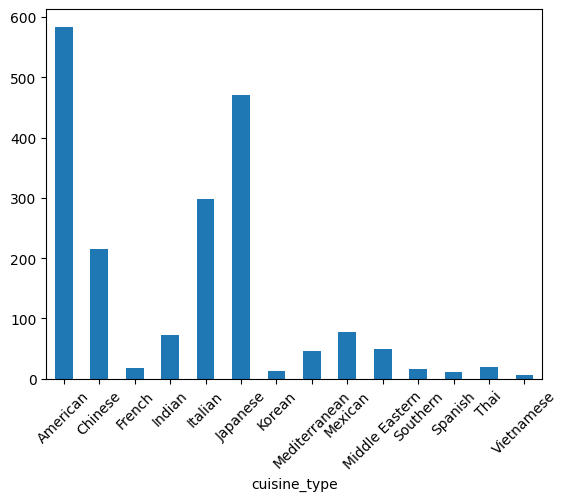

In [29]:
df_orders.groupby("cuisine_type").size().plot(kind='bar');
plt.xticks(rotation = 45)
plt.show()

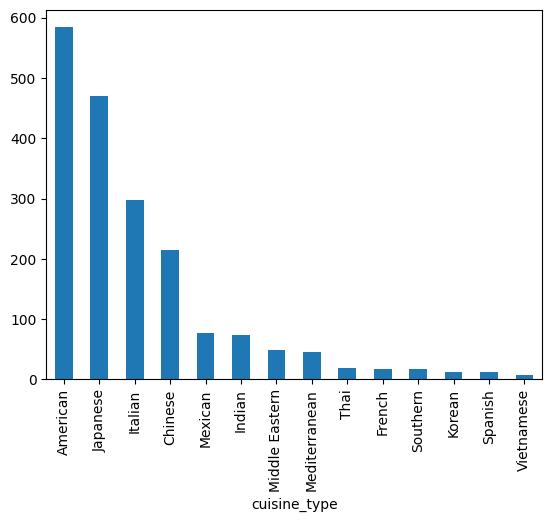

In [56]:
# Conta a frequência de cada valor único na coluna cuisine_type
df_orders.cuisine_type.value_counts().plot(kind = 'bar');

In [31]:
# calcula a média do custo dos pedidos agrupados por tipo de culinária
df_orders.groupby('cuisine_type')['cost_of_the_order'].mean()

cuisine_type
American          16.319829
Chinese           16.305209
French            19.793889
Indian            16.919726
Italian           16.418691
Japanese          16.304532
Korean            14.001538
Mediterranean     15.474783
Mexican           16.933117
Middle Eastern    18.820612
Southern          19.300588
Spanish           18.994167
Thai              19.207895
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

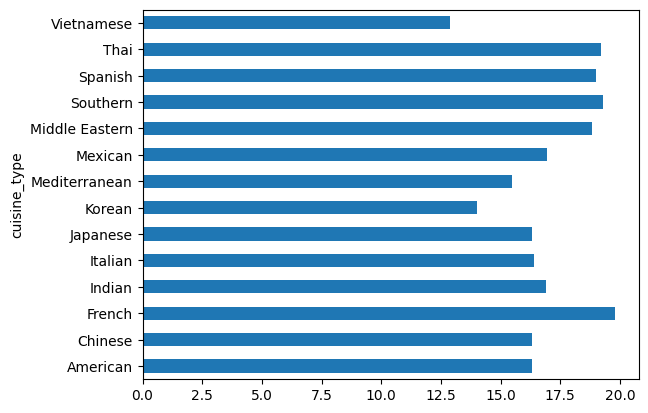

In [32]:
df_orders.groupby('cuisine_type')['cost_of_the_order'].mean().plot(kind='barh');

In [57]:
# Conta quantos registros existem no dias de semana e nos finais de semana
most_ordered_day = df_orders.groupby('day_of_the_week').count()
most_ordered_day = most_ordered_day.reset_index('day_of_the_week')
most_ordered_day

,day_of_the_week,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,rating,food_preparation_time,delivery_time,total_delivery_time
0,Weekday,547,547,547,547,547,547,547,547,547
1,Weekend,1351,1351,1351,1351,1351,1351,1351,1351,1351


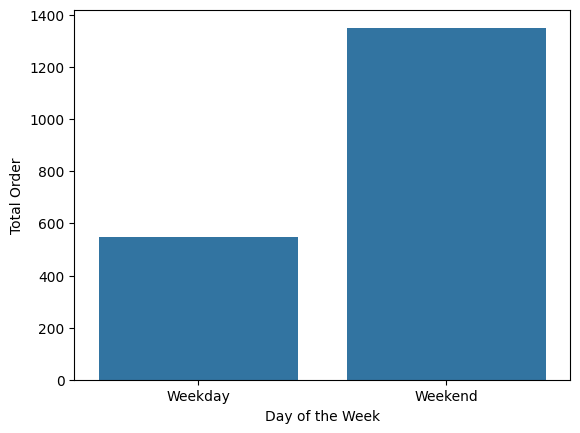

In [59]:
most_ordered_day_plot = sns.barplot(x='day_of_the_week', y='order_id', data= most_ordered_day)
most_ordered_day_plot.set(xlabel='Day of the Week', ylabel='Total Order');

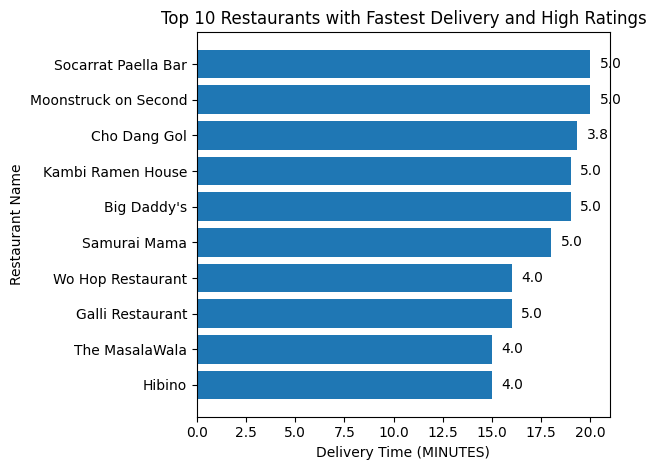

In [97]:
# Agrupar por restaurante e calcular métricas
df_grouped = df_orders.groupby('restaurant_name').agg({
    'delivery_time': 'mean',
    'rating': 'mean'
}).reset_index()

# Filtrar para ratings maiores que 0
df_filtered = df_grouped[df_grouped['rating'] > 3]

# Ordenar pelos restaurantes mais rápidos e com melhor avaliação
top_ten = df_filtered.sort_values(by=['delivery_time', 'rating'], ascending=[True, False]).head(10)

# Criar gráfico de barras horizontais
plt.barh(top_ten['restaurant_name'], top_ten['delivery_time'])
for i, v in enumerate(top_ten['rating']):
    plt.text(top_ten['delivery_time'].iloc[i] + 0.5, i, f'{v:.1f}', va='center')

plt.xlabel('Delivery Time (MINUTES)')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Fastest Delivery and High Ratings')
plt.tight_layout()
plt.show()

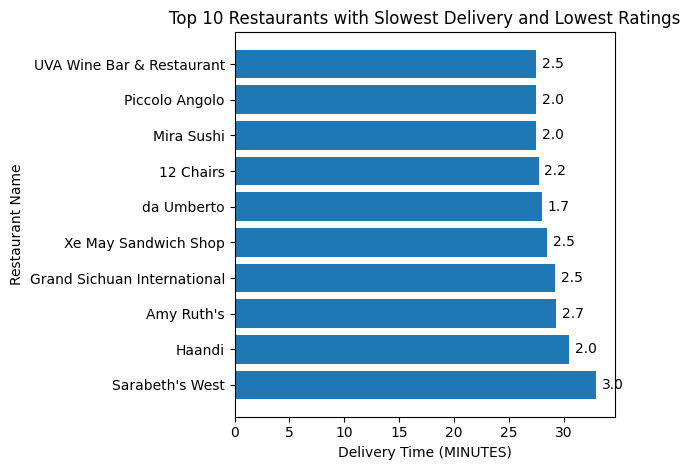

In [91]:
# Agrupar por restaurante e calcular métricas
df_grouped = df_orders.groupby('restaurant_name').agg({
    'delivery_time': 'mean',
    'rating': 'mean'
}).reset_index()

# Filtrar para ratings maiores que 0
df_filtered = df_grouped[(df_grouped['rating'] > 0) & (df_grouped['rating'] <= 3)]


# Ordenar pelos restaurantes mais lentos e com pior avaliação
bottom_ten = df_filtered.sort_values(by=['delivery_time', 'rating'], ascending=[False, True]).head(10)

# Criar gráfico de barras horizontais
plt.barh(bottom_ten['restaurant_name'], bottom_ten['delivery_time'])
for i, v in enumerate(bottom_ten['rating']):
    plt.text(bottom_ten['delivery_time'].iloc[i] + 0.5, i, f'{v:.1f}', va='center')

plt.xlabel('Delivery Time (MINUTES)')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Slowest Delivery and Lowest Ratings')
plt.tight_layout()
plt.show()

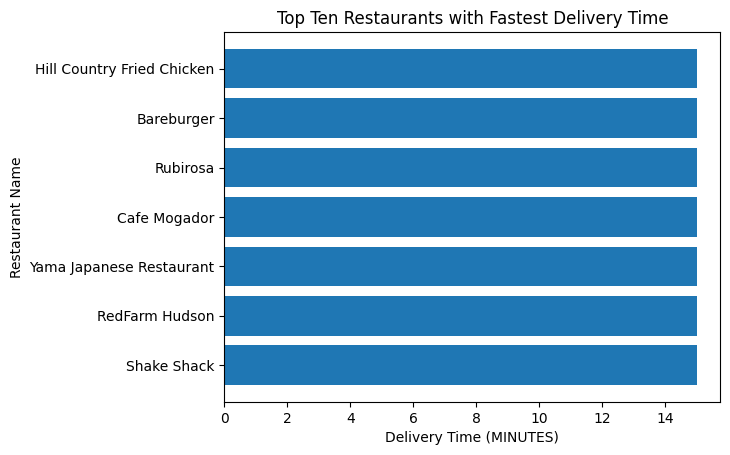

In [70]:
df_sorted = df_orders.sort_values(by='delivery_time')

top_ten = df_sorted.head(10)

# CREATE A HORIZONTAL BAR CHART 
plt.barh(top_ten['restaurant_name'], top_ten['delivery_time'])
plt.xlabel('Delivery Time (MINUTES)')
plt.ylabel('Restaurant Name')
plt.title('Top Ten Restaurants with Fastest Delivery Time')

plt.show()